# Loading the Data

---


In [ ]:
# Import preprocessing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Download the file

!wget 'https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip'

--2023-12-03 18:31:19--  https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip
Resolving maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)... 52.216.24.164, 3.5.10.193, 54.231.195.169, ...
Connecting to maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)|52.216.24.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91005234 (87M) [application/zip]
Saving to: ‘Airbnb+Data.zip’

Airbnb+Data.zip     100%[===================>]  86.79M  55.3MB/s    in 1.6s    

2023-12-03 18:31:21 (55.3 MB/s) - ‘Airbnb+Data.zip’ saved [91005234/91005234]



In [ ]:
!unzip Airbnb+Data.zip

Archive:  Airbnb+Data.zip
   creating: Airbnb Data/
  inflating: Airbnb Data/Listings.csv  
  inflating: Airbnb Data/Listings_data_dictionary.csv  
  inflating: Airbnb Data/Reviews.csv  
  inflating: Airbnb Data/Reviews_data_dictionary.csv  


In [ ]:
# Load the data frames

listings =  pd.read_csv('/content/Airbnb Data/Listings.csv', encoding = 'latin1', low_memory = False)

#reviews = pd.read_csv('/content/Airbnb Data/Reviews.csv', encoding = 'latin1', low_memory = False)

# Random Sample of Data

---

In [ ]:
# Taking a random sample of the data for easier analysis

listings_sample = listings.sample(100000, random_state = 42)

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   100000 non-null  int64  
 1   name                         99929 non-null   object 
 2   host_id                      100000 non-null  int64  
 3   host_since                   99933 non-null   object 
 4   host_location                99704 non-null   object 
 5   host_response_time           54163 non-null   object 
 6   host_response_rate           54163 non-null   float64
 7   host_acceptance_rate         59780 non-null   float64
 8   host_is_superhost            99933 non-null   object 
 9   host_total_listings_count    99933 non-null   float64
 10  host_has_profile_pic         99933 non-null   object 
 11  host_identity_verified       99933 non-null   object 
 12  neighbourhood                100000 non-null  object 

# Column Transformations

---

In [ ]:
# Converting to datetime

listings_sample.host_since = pd.to_datetime(listings.host_since)

In [ ]:
# Converting to out-of-10 scale

listings_sample.review_scores_rating = listings.review_scores_rating / 10

In [ ]:
listings['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [ ]:
# Converting prices to USD

cities = ['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town']
exchange_rates = [1.0808, 1, 0.028388, 0.20328, 0.65462, 0.039480, 1.0808, 0.12777, 0.0493, 0.053215] # update these numbers before fitting models
currency_map = dict(zip(cities, exchange_rates))

listings_sample['usd_price'] = listings_sample.apply(lambda row: row['price'] * currency_map[row['city']], axis=1) # create new column
listings_sample.drop('price', axis = 1, inplace = True) # drop original column

In [ ]:
# Converting to numerical category

# Potentially problematic -> Converting NULL values to zero

listings_sample.host_is_superhost = listings_sample.host_is_superhost.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_has_profile_pic = listings_sample.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_identity_verified = listings_sample.host_identity_verified.apply(lambda x: 1 if x == 't' else 0)
listings_sample.instant_bookable = listings_sample.instant_bookable.apply(lambda x: 1 if x == 't' else 0)

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   100000 non-null  int64         
 1   name                         99929 non-null   object        
 2   host_id                      100000 non-null  int64         
 3   host_since                   99933 non-null   datetime64[ns]
 4   host_location                99704 non-null   object        
 5   host_response_time           54163 non-null   object        
 6   host_response_rate           54163 non-null   float64       
 7   host_acceptance_rate         59780 non-null   float64       
 8   host_is_superhost            100000 non-null  int64         
 9   host_total_listings_count    99933 non-null   float64       
 10  host_has_profile_pic         100000 non-null  int64         
 11  host_identity_verifie

# Dropping Columns

---

In [ ]:
# Dropping hopeless columns

columns_to_drop = ['listing_id', 'name', 'host_id', 'host_location', 'neighbourhood', 'district',  'amenities', 'maximum_nights']

listings_sample = listings_sample.drop(columns=columns_to_drop, axis=1)

In [ ]:
#remember to give explanations

# Data Cleaning

---

In [ ]:
# Get top 5 property_type

listings_sample.property_type.value_counts()[0:5]

Entire apartment             49690
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Categorize the rest into 'Other' category

listings_sample['property_type'] = listings_sample['property_type'].apply(
    lambda x: 'Other' if x not in ('Entire apartment', 'Private room in apartment', 'Private room in house', 'Entire house', 'Entire condominium') else x)

listings_sample.property_type.value_counts()

Entire apartment             49690
Other                        19827
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Checking missing values for host_response_time

listings_sample.host_response_time.value_counts(dropna = False)

NaN                   45837
within an hour        29833
within a few hours    10480
within a day           8408
a few days or more     5442
Name: host_response_time, dtype: int64

In [ ]:
# Replacing missing values with unknown

listings_sample['host_response_time'].fillna('unknown', inplace = True)

In [ ]:
#seeing how many % nulls exist
listings_sample.isnull().sum() / len(listings_sample) * 100

host_since                      0.067
host_response_time              0.000
host_response_rate             45.837
host_acceptance_rate           40.220
host_is_superhost               0.000
host_total_listings_count       0.067
host_has_profile_pic            0.000
host_identity_verified          0.000
city                            0.000
latitude                        0.000
longitude                       0.000
property_type                   0.000
room_type                       0.000
accommodates                    0.000
bedrooms                       10.525
minimum_nights                  0.000
maximum_nights                  0.000
review_scores_rating           32.589
review_scores_accuracy         32.707
review_scores_cleanliness      32.687
review_scores_checkin          32.724
review_scores_communication    32.691
review_scores_location         32.726
review_scores_value            32.727
instant_bookable                0.000
usd_price                       0.000
dtype: float

# EDA (to be continued)

---

In [ ]:
# Checking skew of numerical columns

listings_sample.skew(axis = 0, numeric_only=True)

host_response_rate              -2.270031
host_acceptance_rate            -1.871278
host_is_superhost                1.662356
host_total_listings_count       23.845350
host_has_profile_pic           -15.716597
host_identity_verified          -0.977378
latitude                        -0.711813
longitude                        0.487746
accommodates                     2.207221
bedrooms                        12.370222
minimum_nights                  16.577005
maximum_nights                 316.176633
review_scores_rating            -3.746942
review_scores_accuracy          -4.163205
review_scores_cleanliness       -2.999510
review_scores_checkin           -5.228129
review_scores_communication     -5.216378
review_scores_location          -4.274060
review_scores_value             -3.240565
instant_bookable                 0.354066
usd_price                       37.113835
dtype: float64

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   host_since                   99933 non-null   datetime64[ns]
 1   host_response_time           100000 non-null  object        
 2   host_response_rate           54163 non-null   float64       
 3   host_acceptance_rate         59780 non-null   float64       
 4   host_is_superhost            100000 non-null  int64         
 5   host_total_listings_count    99933 non-null   float64       
 6   host_has_profile_pic         100000 non-null  int64         
 7   host_identity_verified       100000 non-null  int64         
 8   city                         100000 non-null  object        
 9   latitude                     100000 non-null  float64       
 10  longitude                    100000 non-null  float64       
 11  property_type        

In [ ]:
listings_sample.head(10).T

,179118,187483,17637,118289,53401,99109,166994,100798,122238,69533
host_since,2014-09-14 00:00:00,2020-10-23 00:00:00,2015-02-25 00:00:00,2019-11-25 00:00:00,2018-12-14 00:00:00,2015-08-19 00:00:00,2017-05-20 00:00:00,2015-10-14 00:00:00,2015-02-02 00:00:00,2013-09-05 00:00:00
host_response_time,unknown,within an hour,unknown,a few days or more,unknown,unknown,within an hour,unknown,unknown,within a day
host_response_rate,NaN,1.0,NaN,0.2,NaN,NaN,1.0,NaN,NaN,1.0
host_acceptance_rate,NaN,1.0,NaN,1.0,NaN,NaN,0.9,NaN,NaN,0.4
host_is_superhost,0,1,0,0,0,0,1,0,0,0
host_total_listings_count,3.0,1.0,1.0,9.0,6.0,1.0,0.0,0.0,2.0,2.0
host_has_profile_pic,1,1,1,1,1,1,1,1,1,1
host_identity_verified,1,1,1,1,1,1,1,0,1,1
city,Bangkok,New York,New York,Sydney,Cape Town,Paris,Mexico City,Rome,New York,Rome
latitude,13.74099,40.80169,40.72571,-33.90051,-33.90905,48.89301,19.44734,41.88249,40.74436,41.94724


In [ ]:
listings_sample['review_scores_value'].min()

2.0

In [ ]:
listings_sample['review_scores_value'].max()

10.0

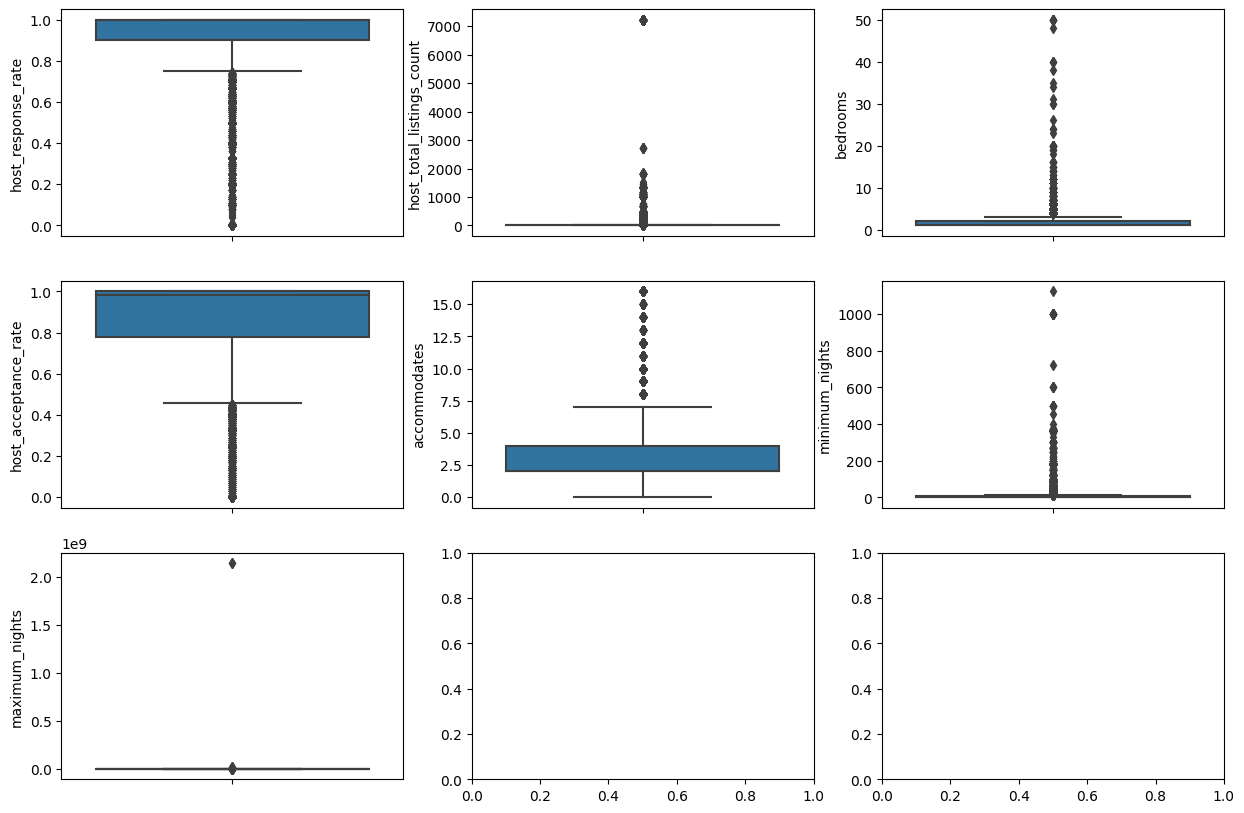

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])

plt.show();

## host_total_listings_count



In [ ]:
#seeing how many rows there are where host_total_listings_count was over 250
listings_sample[listings_sample['host_total_listings_count'] > 250]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
205664,2018-02-24,within an hour,1.00,0.99,0,7235.0,1,1,Sydney,-33.88212,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,113.903880
114955,2013-01-04,within an hour,1.00,0.71,0,266.0,1,0,Hong Kong,22.27848,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22.998600
167819,2018-02-24,within an hour,1.00,0.99,0,7235.0,1,1,Sydney,-33.73133,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,143.361780
105794,2016-09-29,within a few hours,1.00,0.75,0,369.0,1,0,Hong Kong,22.32676,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21.720900
38668,2020-01-09,within a few hours,0.98,0.80,0,279.0,1,1,Paris,48.87870,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.352800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240375,2019-06-21,within an hour,1.00,0.99,0,1337.0,1,1,Rome,41.90487,...,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,153.473600
118338,2013-07-16,within an hour,0.93,0.74,1,386.0,1,0,Hong Kong,22.28157,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.054700
225932,2015-05-21,within an hour,0.89,0.97,0,1105.0,1,1,Paris,48.85695,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174.008800
38913,2016-08-24,within an hour,0.99,0.67,0,275.0,1,1,Rio de Janeiro,-22.98207,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,152.460000


In [ ]:
#dropping everything over 250

#host_total_listings_count -> this also dropped all the nulls in the column, if we dont want that we can use a boolean 'and' function to keep them
listings_sample = listings_sample[listings_sample['host_total_listings_count'] <= 250 |]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.00,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.00,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235948,2016-08-26,within an hour,1.0,0.36,0,23.0,1,1,Sydney,-33.79647,...,180,9.3,10.0,10.0,10.0,10.0,10.0,9.0,0,65.462000
248673,2017-12-29,within an hour,1.0,1.00,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.00,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565
245237,2016-05-17,within a few hours,1.0,1.00,0,0.0,1,0,Paris,48.86877,...,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,83.221600


In [ ]:
listings_sample['host_total_listings_count'].isna().sum()

0

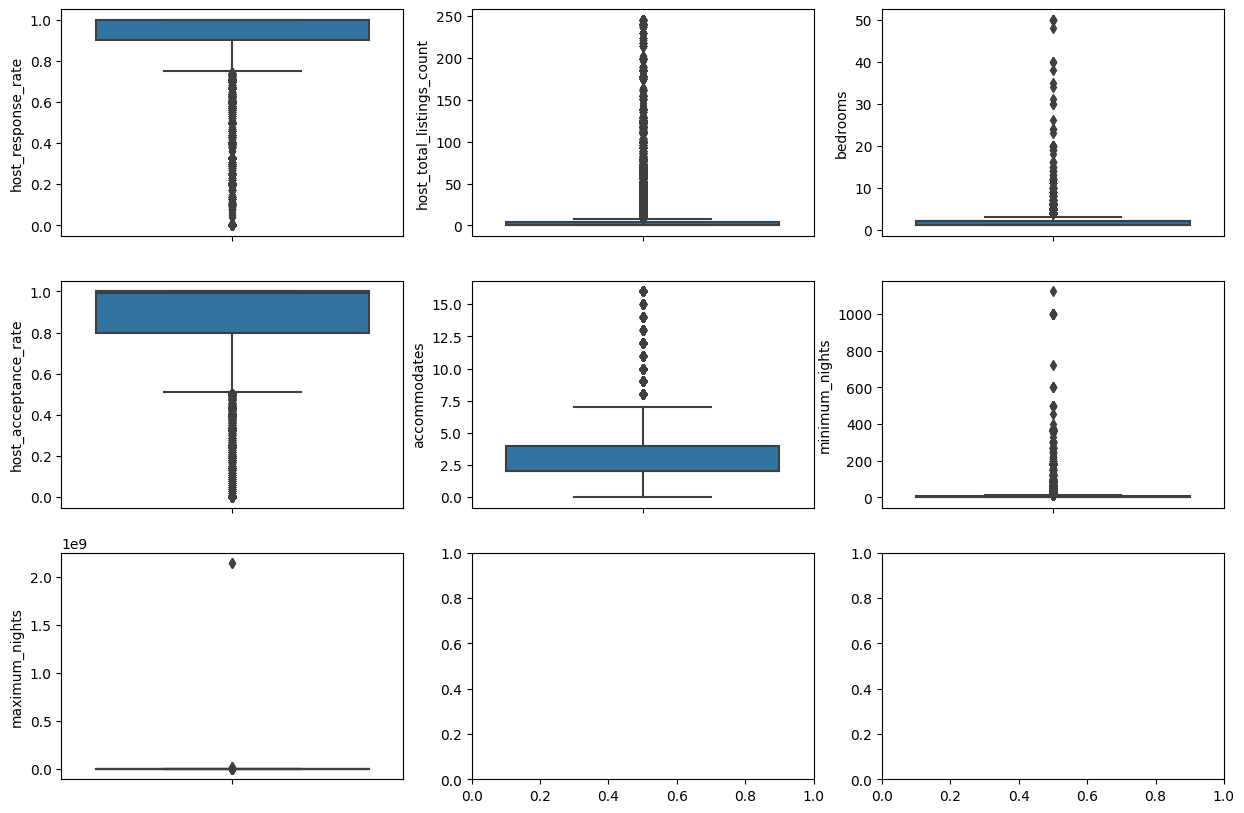

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])

plt.show();

In [ ]:
#now seeing how many rows still have over 50

listings_sample[listings_sample['host_total_listings_count'] > 50]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
79633,2016-04-18,within an hour,1.00,0.82,1,230.0,1,1,Hong Kong,22.30015,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,23.637450
237107,2018-04-20,within an hour,1.00,0.97,0,81.0,1,1,Cape Town,-33.91442,...,60,9.4,10.0,10.0,10.0,9.0,10.0,10.0,1,128.727085
183083,2013-09-06,within an hour,1.00,0.87,0,73.0,1,1,Bangkok,13.73210,...,365,8.7,10.0,10.0,9.0,9.0,8.0,9.0,0,69.550600
85797,2015-07-27,within a day,0.90,0.00,0,119.0,1,1,Bangkok,13.72196,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38.607680
39085,2013-07-22,within a few hours,0.92,0.93,0,186.0,1,1,Paris,48.85957,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,162.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115113,2016-04-18,within an hour,1.00,0.82,1,230.0,1,1,Hong Kong,22.31282,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19.165500
48806,2018-11-22,within an hour,0.95,0.90,0,63.0,1,1,Paris,48.88424,...,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,184.816800
239365,2015-12-24,within an hour,1.00,0.98,0,67.0,1,1,Bangkok,13.74915,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,19.048348
42551,2012-10-16,within a few hours,0.79,0.98,0,72.0,1,1,Cape Town,-33.92139,...,1125,7.6,8.0,9.0,8.0,8.0,10.0,8.0,1,36.132985


In [ ]:
#maybe drop at 50?

In [ ]:
listings_sample.isnull().sum() / len(listings_sample) * 100

host_since                      0.000000
host_response_time              0.000000
host_response_rate             46.364171
host_acceptance_rate           40.673880
host_is_superhost               0.000000
host_total_listings_count       0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
city                            0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                       10.483021
minimum_nights                  0.000000
maximum_nights                  0.000000
review_scores_rating           32.006240
review_scores_accuracy         32.124767
review_scores_cleanliness      32.104506
review_scores_checkin          32.141989
review_scores_communication    32.109571
review_scores_location         32.145028
review_scores_value            32.146041
instant_bookable

There are a lot of listings where the host has "0" total listings. We're gonna drop it for now but it is like 10% of the data fwiw

In [ ]:
listings_sample[listings_sample['host_total_listings_count'] == 0]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
166994,2017-05-20,within an hour,1.0,0.90,1,0.0,1,1,Mexico City,19.44734,...,30,9.0,10.0,10.0,10.0,10.0,10.0,9.0,0,11.832000
100798,2015-10-14,unknown,NaN,NaN,0,0.0,1,0,Rome,41.88249,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,54.040000
58085,2019-12-19,unknown,NaN,NaN,0,0.0,1,0,Rio de Janeiro,-22.96596,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50.820000
247045,2014-10-15,within a day,1.0,1.00,0,0.0,1,1,Paris,48.85925,...,30,9.6,10.0,9.0,10.0,10.0,10.0,10.0,0,378.280000
85051,2018-03-21,a few days or more,0.5,0.63,0,0.0,1,0,Bangkok,13.73672,...,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,16.465040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234771,2014-10-29,unknown,NaN,NaN,0,0.0,1,1,Paris,48.88543,...,4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,97.272000
56863,2016-01-30,unknown,NaN,NaN,0,0.0,1,1,Sydney,-33.95248,...,1125,10.0,10.0,10.0,10.0,10.0,8.0,8.0,1,58.915800
108591,2016-03-06,a few days or more,0.0,NaN,0,0.0,1,0,Bangkok,13.68794,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9.140936
172586,2019-05-08,within an hour,1.0,0.88,0,0.0,1,1,New York,40.83708,...,21,9.7,10.0,9.0,10.0,10.0,9.0,10.0,0,69.000000


In [ ]:
#dropping the 0s
listings_sample = listings_sample[listings_sample['host_total_listings_count'] > 0]

In [ ]:
#dropping any bigger than 50
listings_sample = listings_sample[listings_sample['host_total_listings_count'] <= 50]

## bedrooms

In [ ]:
#seeing how many listings > 15 there are
listings_sample[listings_sample['bedrooms'] > 10]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
94570,2017-08-29,within a few hours,1.00,0.67,0,4.0,1,0,Istanbul,41.01391,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,0,13.423200
97773,2019-04-22,unknown,NaN,NaN,0,4.0,1,0,Bangkok,13.71511,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,49.679000
94634,2012-12-20,within an hour,1.00,0.97,0,35.0,1,1,Mexico City,19.41278,...,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1358.855900
94026,2017-07-27,within a few hours,1.00,0.91,0,9.0,1,1,Mexico City,19.41535,...,1125,4.0,4.0,4.0,10.0,8.0,6.0,4.0,0,24.157000
207355,2019-03-22,unknown,NaN,NaN,0,5.0,1,1,Cape Town,-33.89851,...,30,8.0,10.0,8.0,10.0,10.0,8.0,10.0,1,21.286000
218199,2019-05-18,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.82708,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17.032800
215357,2017-07-28,a few days or more,0.40,NaN,0,1.0,1,0,Istanbul,41.03007,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.448720
214930,2014-04-10,within a day,1.00,NaN,0,1.0,1,1,Sydney,-33.76148,...,21,10.0,10.0,10.0,10.0,10.0,8.0,8.0,1,458.234000
215456,2016-08-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.28640,...,360,8.0,10.0,10.0,8.0,8.0,8.0,10.0,1,17.304300
215445,2018-04-24,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.67619,...,30,8.0,8.0,8.0,8.0,8.0,9.0,9.0,1,26.826660


In [ ]:
#we are dropping those.
listings_sample = listings_sample[listings_sample['bedrooms'] <= 10]

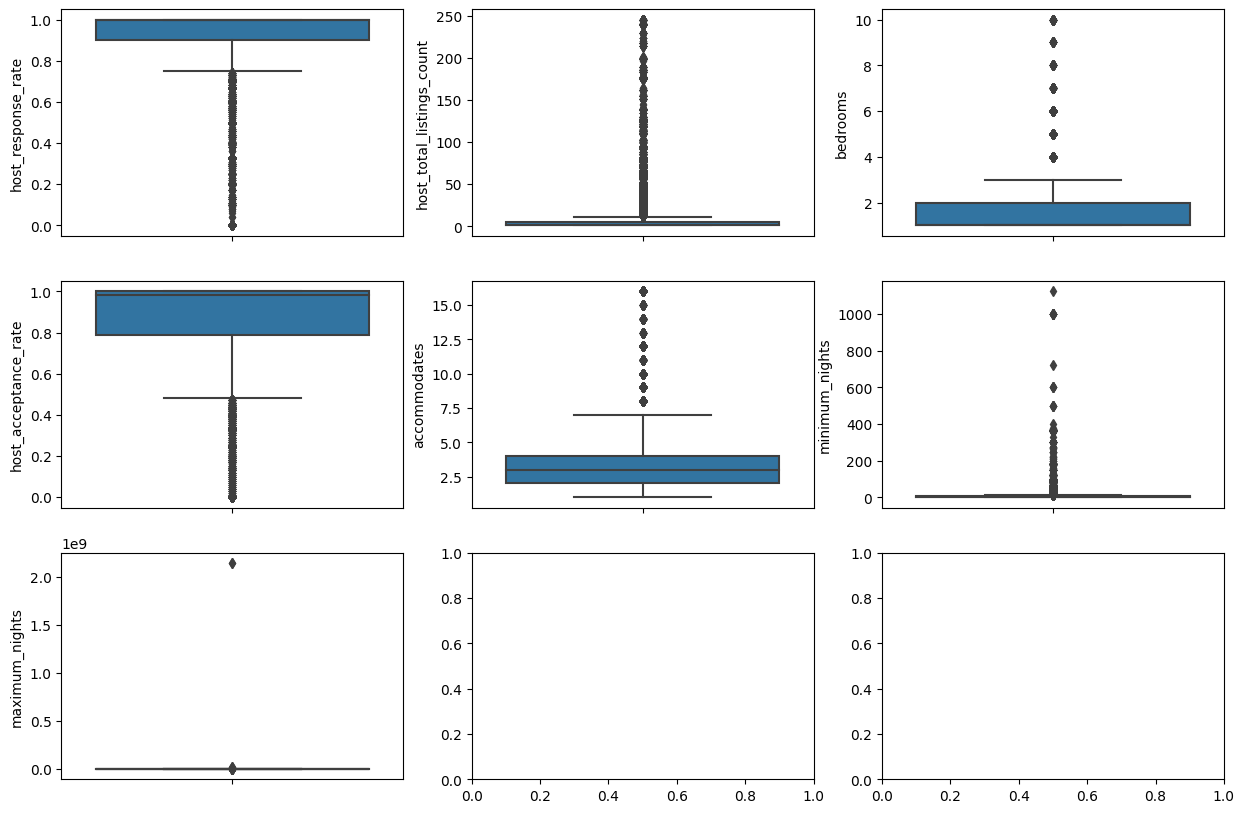

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])

plt.show();

## accomodates

In [ ]:
listings_sample['accommodates'].min()

1

In [ ]:
listings_sample['accommodates'].max()

16

Interestingly, dropping listings with high bedroom counts did not affect the max accomodates (maybe its a a system maximum?), and 16 seems reasonable, so we are leaving it.

Maaaaaaybe this should be categorical? Idk? food for thought

## minimum_nights

In [ ]:
#we checked for 0s and there were already none

In [ ]:
#seeing how many are minimum 1 month stay
listings_sample[listings_sample['minimum_nights'] > 30]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
39085,2013-07-22,within a few hours,0.92,0.93,0,186.0,1,1,Paris,48.85957,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,162.12000
88681,2013-01-24,unknown,NaN,0.83,1,1.0,1,1,New York,40.76191,...,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,80.00000
177563,2016-02-03,unknown,NaN,1.00,0,5.0,1,1,Rome,41.90396,...,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30.26240
30601,2014-02-24,within a few hours,1.00,NaN,0,1.0,1,1,Sydney,-33.82198,...,1125,9.2,10.0,10.0,10.0,10.0,10.0,9.0,0,98.19300
19839,2015-05-26,unknown,NaN,NaN,0,1.0,1,1,Sydney,-33.86172,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,97.53838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195273,2015-12-13,unknown,NaN,NaN,0,2.0,1,0,Bangkok,13.66934,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22.71040
189047,2016-05-23,a few days or more,0.00,NaN,0,1.0,1,1,Cape Town,-34.08660,...,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.30375
37054,2016-06-06,within a day,0.56,0.13,0,4.0,1,1,New York,40.71995,...,1125,9.3,9.0,9.0,10.0,9.0,10.0,9.0,0,75.00000
37923,2013-07-22,within a few hours,0.92,0.93,0,186.0,1,1,Paris,48.86461,...,1125,8.3,8.0,9.0,9.0,9.0,10.0,8.0,0,226.96800


In [ ]:
#we are dropping those!
listings_sample = listings_sample[listings_sample['minimum_nights'] <= 30]

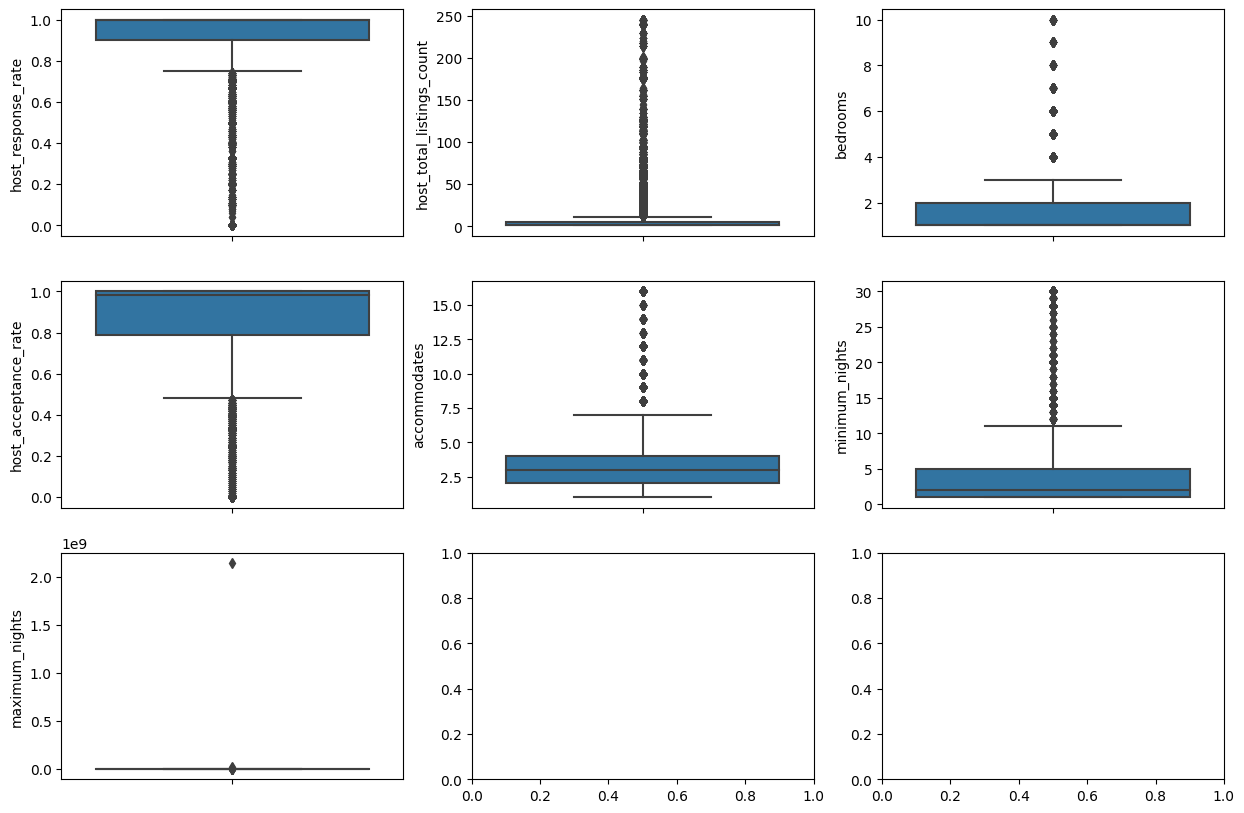

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[2, 0])

plt.show();

## maximum_nights

After examining the data, there is a debate on whether or not to drop the entire column.
Pro dropping the entire column: even the listings with a super high 'maximum night' stay are legit listings where all other columns have legit info, so like, I think there was just a short answer box that hosts could fill it in with whatever and they're just randomly inputing a super large number, so this column has no value and to drop those "outliers" would actually be getting rid of legit listings with real info

but then again its only 3 listings so we could just drop everything over 2200, I just worry that as a column itself it might not affect price much so its just adding noise to the models (ie the models would perform better without it)

In [ ]:
#listings_sample = listings_sample[listings_sample['maximum_nights'] <= 9000]

In [ ]:
#listings_sample[listings_sample['maximum_nights'] > 365]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.00,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
122238,2015-02-02,unknown,NaN,NaN,0,2.0,1,1,New York,40.74436,...,1125,9.4,10.0,9.0,10.0,10.0,10.0,10.0,0,90.000000
69533,2013-09-05,within a day,1.0,0.40,0,2.0,1,1,Rome,41.94724,...,1125,9.3,9.0,9.0,10.0,10.0,9.0,9.0,0,64.848000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69515,2015-08-25,within an hour,1.0,0.99,0,7.0,1,1,Sydney,-33.88761,...,1125,8.6,9.0,9.0,10.0,10.0,9.0,9.0,0,60.225040
143222,2012-05-09,within a few hours,1.0,1.00,1,1.0,1,1,Sydney,-33.89664,...,1125,9.9,10.0,10.0,10.0,10.0,10.0,10.0,0,125.687040
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.193000
70903,2015-03-13,within a few hours,1.0,1.00,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


<Axes: ylabel='maximum_nights'>

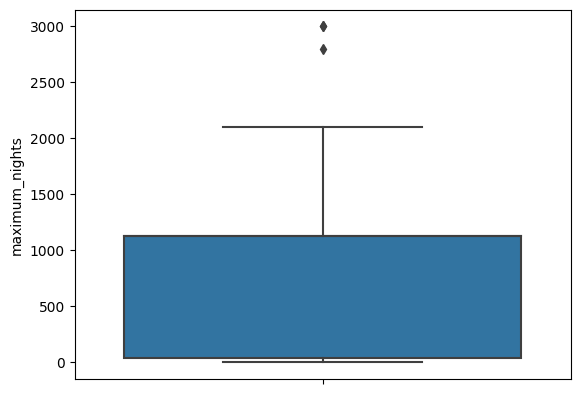

In [ ]:
#sns.boxplot(listings_sample, y = 'maximum_nights')

<Axes: xlabel='maximum_nights', ylabel='Count'>

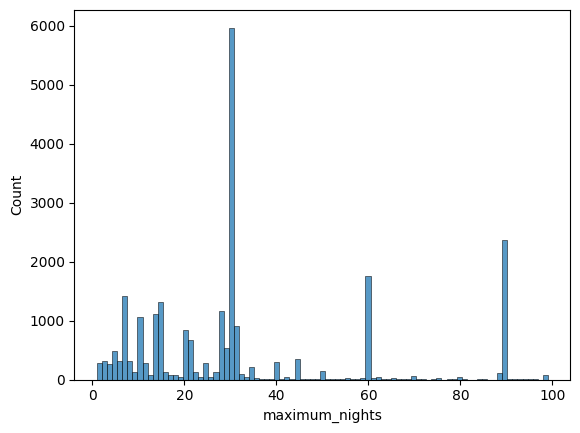

In [ ]:
#sns.histplot(listings_sample[listings_sample['maximum_nights'] < 100], x='maximum_nights')

In [ ]:
#listings_sample[listings_sample['maximum_nights'] > 2200]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
243442,2015-11-29,within a day,1.0,0.5,0,2.0,1,1,Cape Town,-33.92129,...,3000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,45.7649
198911,2016-01-18,unknown,NaN,NaN,0,1.0,1,1,New York,40.64957,...,3000,9.6,10.0,10.0,10.0,10.0,9.0,10.0,0,65.0000
219608,2013-05-21,within a day,0.5,NaN,0,19.0,1,1,Hong Kong,22.28163,...,2800,9.7,10.0,9.0,10.0,10.0,10.0,9.0,0,127.7700


In [ ]:
#listings_sample[listings_sample['maximum_nights'] == 0]
#there are no listings = 0 so no need to drop anything

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


## PRICE!

<Axes: xlabel='city', ylabel='usd_price'>

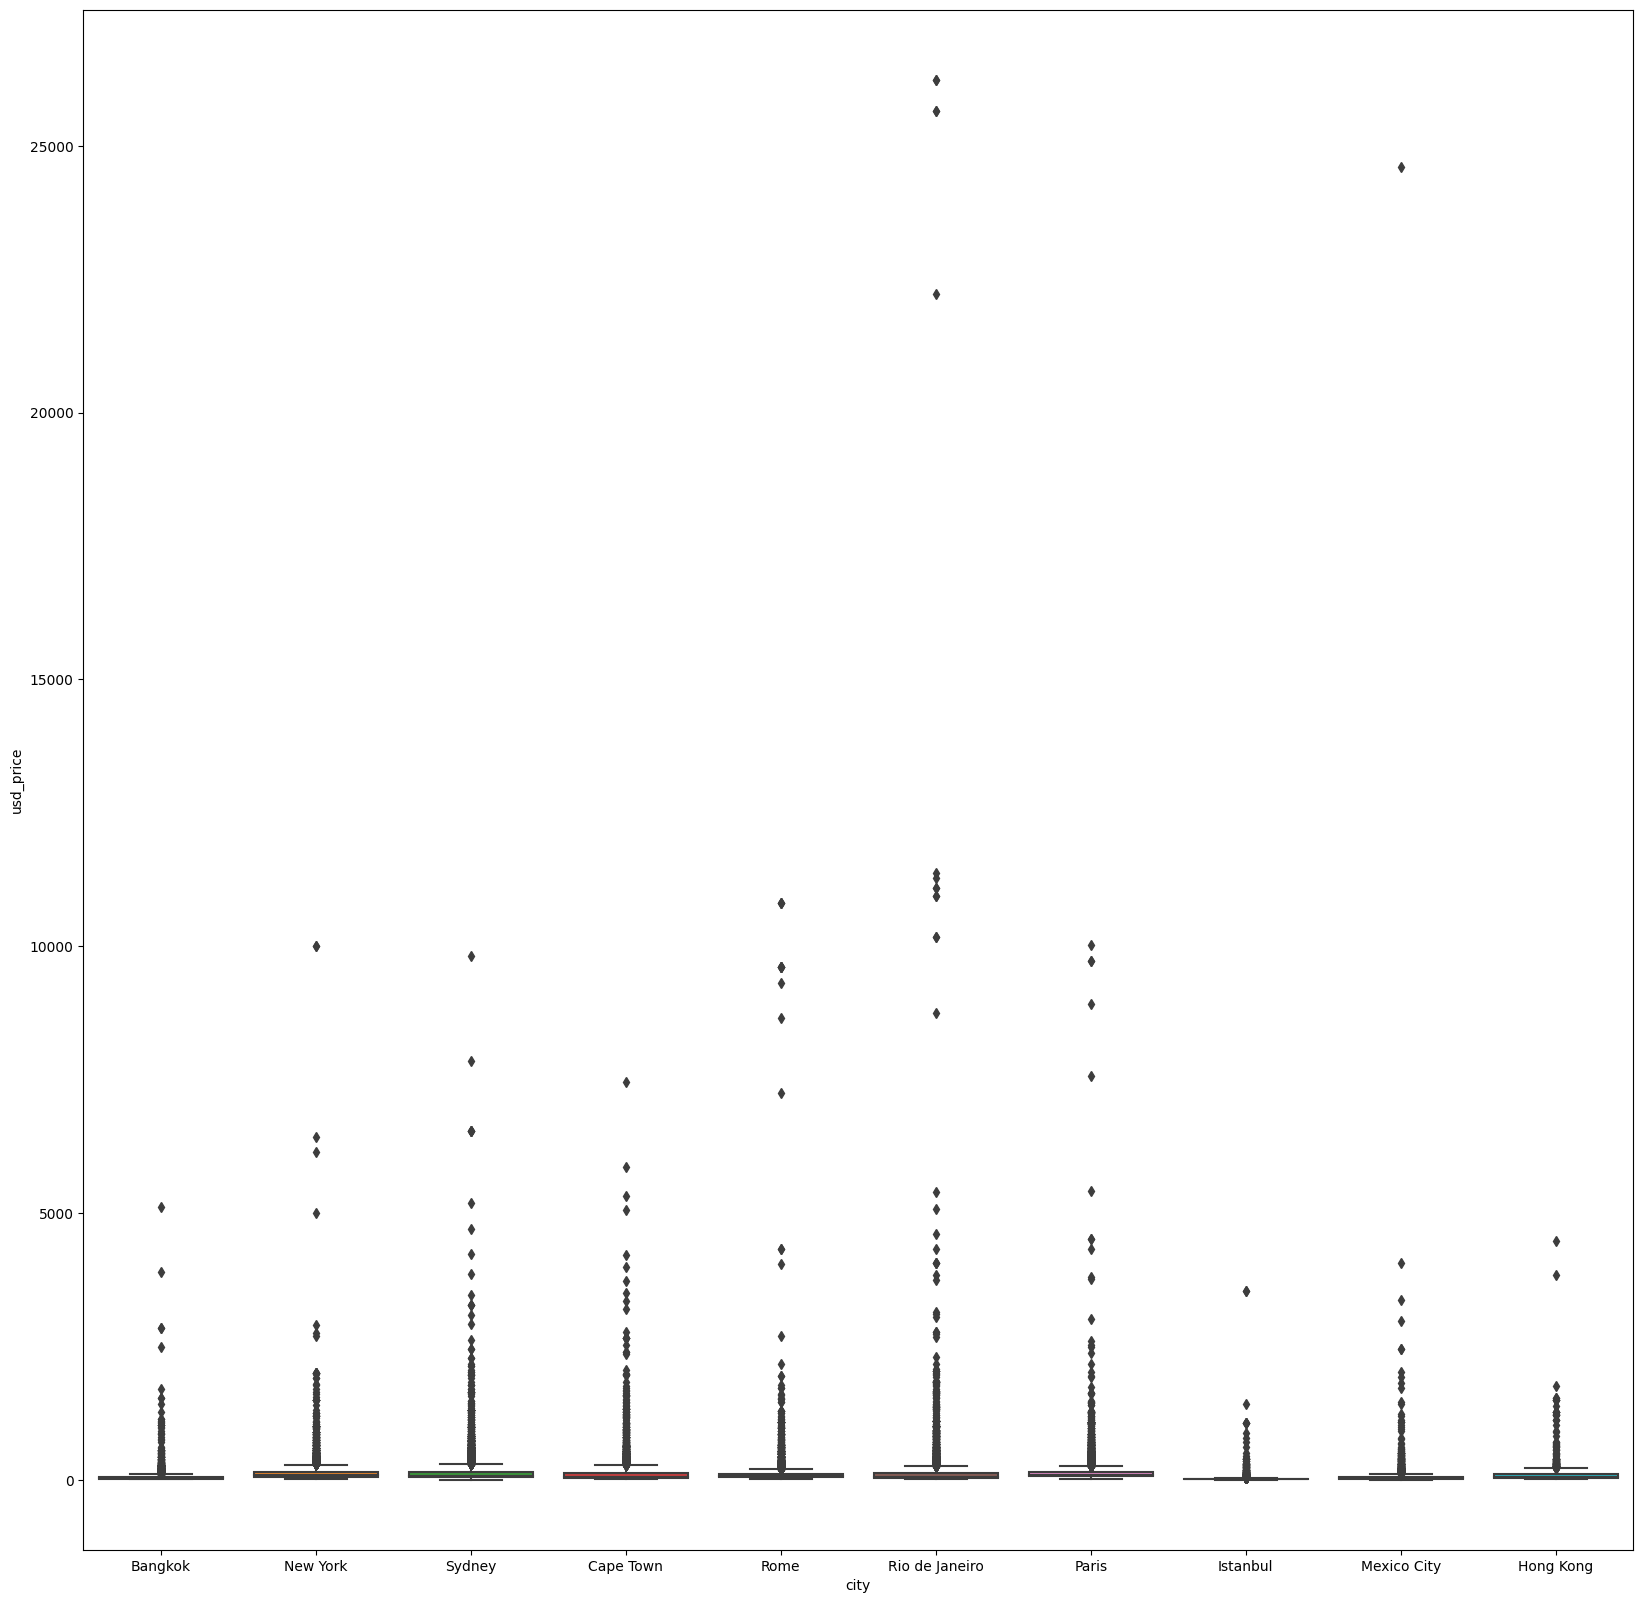

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(listings_sample, x= 'city', y = 'usd_price')

### Bangkok

<Axes: ylabel='usd_price'>

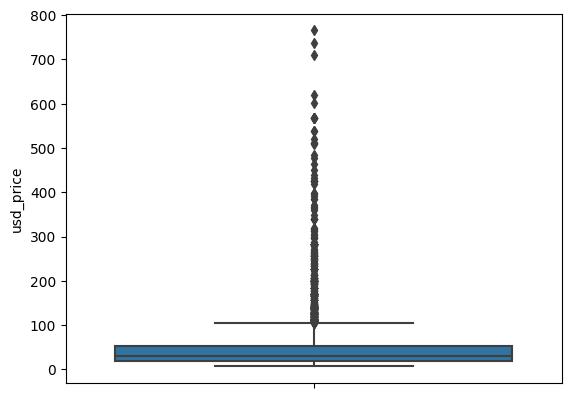

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Bangkok'], y = 'usd_price')

We're using 700 as a cut off after going on the Airbnb website and seeing 700 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] > 800)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


In [ ]:
#dropping all 26 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] <= 800) | (listings_sample['city'] != 'Bangkok')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### New York

<Axes: ylabel='usd_price'>

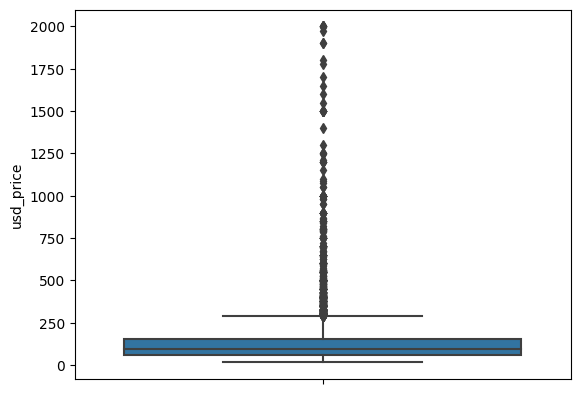

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='New York'], y = 'usd_price')

We're using 2000 as a cut off after going on the Airbnb website and seeing 2000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] > 2000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'New York')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Sydney

<Axes: ylabel='usd_price'>

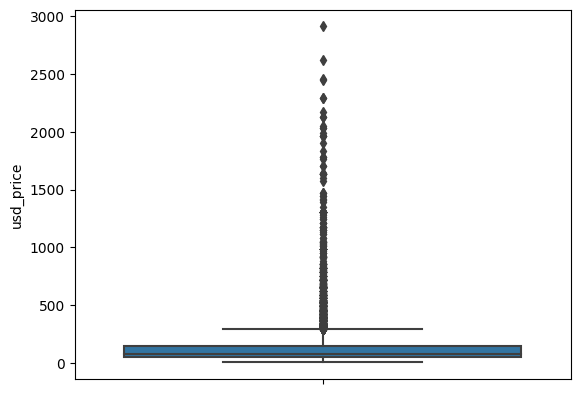

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Sydney'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Sydney')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Cape Town

<Axes: ylabel='usd_price'>

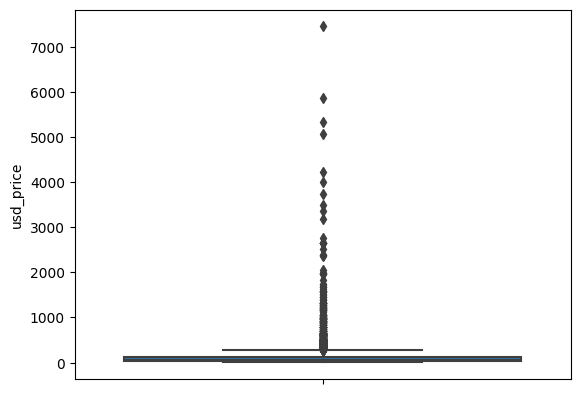

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Cape Town'], y = 'usd_price')

We're using 2000 as a cut off after going on the Airbnb website and seeing 2000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] > 2000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
60798,2010-09-02,within a few hours,1.00,0.00,0,5.0,1,1,Cape Town,-33.90467,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3991.125000
85481,2015-03-21,a few days or more,0.40,0.00,0,12.0,1,1,Cape Town,-33.95412,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2365.885685
205811,2019-09-25,within a few hours,1.00,0.00,0,2.0,1,1,Cape Town,-33.92504,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3496.970510
97245,2017-03-28,within an hour,1.00,0.01,0,31.0,1,1,Cape Town,-33.90988,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7450.100000
217042,2017-04-24,unknown,NaN,NaN,0,1.0,1,1,Cape Town,-34.01393,...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2660.750000
80613,2017-03-28,within an hour,1.00,0.01,0,31.0,1,1,Cape Town,-33.93208,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2394.675000
93963,2017-03-28,within an hour,1.00,0.01,0,31.0,1,1,Cape Town,-33.96192,...,1125,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,3352.545000
79194,2014-08-05,within a day,1.00,0.33,0,10.0,1,1,Cape Town,-33.96188,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3192.900000
134318,2019-07-19,within an hour,1.00,0.00,0,7.0,1,1,Cape Town,-33.93612,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2061.336240
218795,2017-04-14,unknown,NaN,NaN,0,1.0,1,0,Cape Town,-33.92811,...,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3725.050000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'Cape Town')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Rome

<Axes: ylabel='usd_price'>

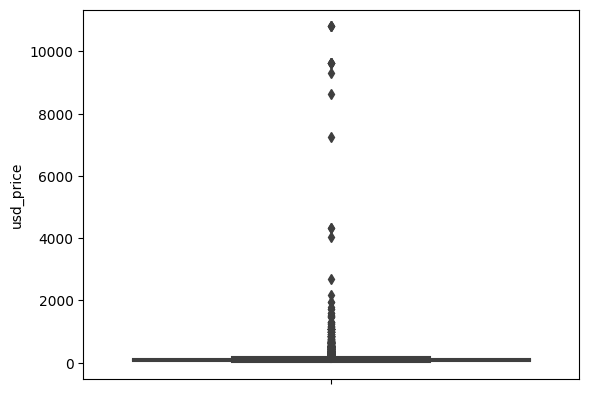

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rome'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
70673,2016-06-03,within an hour,1.0,1.00,0,14.0,1,1,Rome,41.89668,...,1125,8.6,9.0,9.0,9.0,9.0,9.0,9.0,0,9310.0112
53381,2017-10-05,unknown,NaN,NaN,0,52.0,1,1,Rome,41.89995,...,1125,9.5,10.0,10.0,10.0,10.0,10.0,9.0,1,7250.0064
149698,2019-10-30,unknown,NaN,NaN,0,8.0,1,1,Rome,41.90413,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10808.0000
151092,2019-10-30,unknown,NaN,NaN,0,4.0,1,1,Rome,41.90451,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9619.1200
151087,2019-10-30,unknown,NaN,NaN,0,3.0,1,1,Rome,41.90791,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9619.1200
151091,2019-10-30,unknown,NaN,NaN,0,4.0,1,1,Rome,41.90460,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9619.1200
151089,2019-10-30,unknown,NaN,NaN,0,8.0,1,1,Rome,41.90332,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10808.0000
245975,2013-04-29,within an hour,1.0,1.00,0,18.0,1,1,Rome,41.90015,...,30,9.5,9.0,9.0,10.0,10.0,10.0,9.0,1,4319.9576
149255,2019-10-30,unknown,NaN,NaN,0,3.0,1,1,Rome,41.90670,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9619.1200
249878,2013-02-28,within an hour,1.0,1.00,0,17.0,1,1,Rome,41.89961,...,1124,9.7,10.0,10.0,10.0,10.0,10.0,10.0,1,4319.9576


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Rome')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Rio de Janeiro

<Axes: ylabel='usd_price'>

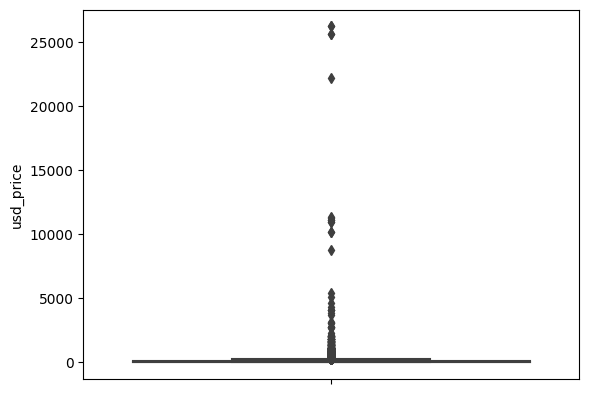

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rio de Janeiro'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] > 5000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
222758,2020-03-11,within an hour,0.91,0.89,0,23.0,1,1,Rio de Janeiro,-22.97870,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11279.80392
38847,2011-07-30,within an hour,0.96,0.56,1,15.0,1,1,Rio de Janeiro,-22.98682,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5082.00000
20027,2016-03-17,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.96740,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11088.92400
37652,2015-04-06,within an hour,0.90,1.00,1,10.0,1,1,Rio de Janeiro,-23.00518,...,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,22214.64168
35944,2014-07-21,a few days or more,0.00,NaN,0,1.0,1,1,Rio de Janeiro,-22.91658,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11088.92400
204377,2015-04-06,within an hour,1.00,0.98,1,34.0,1,1,Rio de Janeiro,-23.00070,...,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11379.20784
190319,2019-02-16,unknown,NaN,0.00,0,3.0,1,0,Rio de Janeiro,-22.96604,...,31,8.2,9.0,8.0,10.0,10.0,10.0,8.0,0,10164.00000
265537,2013-11-16,within an hour,1.00,1.00,0,1.0,1,0,Rio de Janeiro,-22.97810,...,300,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,5392.20528
60687,2015-01-30,within a day,1.00,0.00,0,10.0,1,1,Rio de Janeiro,-22.99933,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8753.23680
134600,2019-03-07,within a day,1.00,NaN,0,27.0,1,1,Rio de Janeiro,-22.96391,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25660.64424


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] <= 5000) | (listings_sample['city'] != 'Rio de Janeiro')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Paris

<Axes: ylabel='usd_price'>

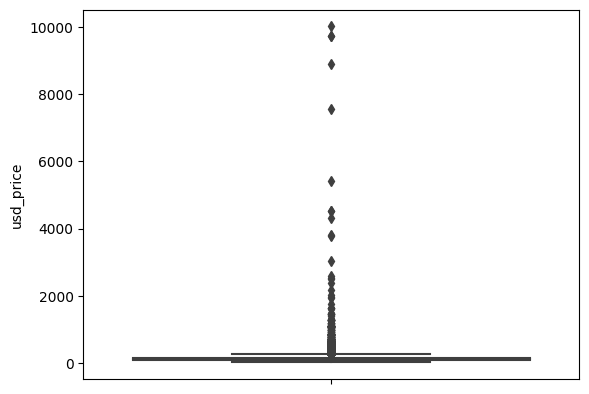

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Paris'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187291,2015-07-04,within an hour,1.0,1.00,0,1.0,1,1,Paris,48.88260,...,60,9.0,9.0,8.0,10.0,9.0,9.0,9.0,0,5404.0000
96656,2018-04-10,unknown,NaN,0.01,0,15.0,1,1,Paris,48.86453,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4517.7440
96072,2016-09-17,within an hour,1.0,1.00,0,12.0,1,0,Paris,48.86757,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3019.7552
96657,2018-04-10,unknown,NaN,0.01,0,15.0,1,1,Paris,48.86222,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3804.4160
151218,2018-07-24,unknown,NaN,NaN,0,7.0,1,1,Paris,48.87363,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3763.3456
152315,2019-06-19,unknown,NaN,NaN,0,1.0,1,1,Paris,48.86285,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8911.1960
67375,2015-02-23,within a day,1.0,NaN,0,2.0,1,1,Paris,48.84538,...,1125,10.0,10.0,9.0,10.0,10.0,10.0,10.0,0,9727.2000
60845,2018-07-20,within an hour,1.0,0.95,0,5.0,1,1,Paris,48.87738,...,1125,9.0,9.0,9.0,9.0,10.0,10.0,9.0,1,10029.8240
232338,2011-10-11,unknown,NaN,NaN,0,2.0,1,1,Paris,48.86545,...,572,9.0,9.0,9.0,9.0,8.0,10.0,9.0,0,7565.6000
96837,2018-04-10,unknown,NaN,0.01,0,15.0,1,1,Paris,48.86248,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4517.7440


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Paris')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Istanbul

<Axes: ylabel='usd_price'>

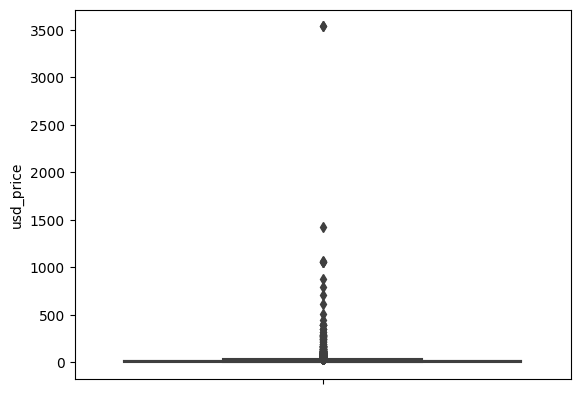

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Istanbul'], y = 'usd_price')

We're using 1000 as a cut off after going on the Airbnb website and seeing 1000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] > 1000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
218045,2019-11-13,unknown,NaN,NaN,0,1.0,1,1,Istanbul,40.96382,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1063.1964
181279,2016-02-22,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.01163,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1061.0250
97664,2018-03-02,within an hour,1.0,NaN,0,1.0,1,1,Istanbul,41.10224,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1061.0250
96438,2020-02-26,a few days or more,0.0,1.0,0,7.0,1,1,Istanbul,41.12106,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3536.4210
67108,2012-04-26,within a few hours,1.0,NaN,0,15.0,1,0,Istanbul,41.00574,...,1125,8.7,7.0,9.0,7.0,9.0,10.0,9.0,0,1428.3864
98587,2018-05-14,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.01365,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1061.0250
133769,2020-02-26,a few days or more,0.0,1.0,0,7.0,1,1,Istanbul,41.11972,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3536.4210


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Istanbul')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Mexico City

<Axes: ylabel='usd_price'>

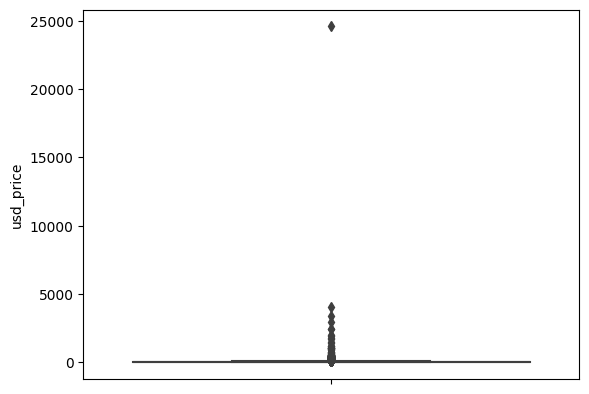

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Mexico City'], y = 'usd_price')

We're using 1500 as a cut off after going on the Airbnb website and seeing 1500 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] > 1500)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
98551,2016-08-02,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.43080,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1712.8792
217491,2020-07-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.39622,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4072.1800
225627,2015-06-11,a few days or more,0.0,1.00,0,2.0,1,0,Mexico City,19.44961,...,6,9.7,9.0,9.0,10.0,10.0,10.0,10.0,0,3360.8303
149086,2016-05-23,unknown,NaN,NaN,0,2.0,1,1,Mexico City,19.21311,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2015.1375
94332,2013-04-17,within an hour,1.0,0.86,0,11.0,1,1,Mexico City,19.40176,...,1125,9.0,10.0,9.0,10.0,10.0,10.0,10.0,0,1817.9375
14511,2020-05-18,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.43551,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1928.0244
193527,2018-05-23,unknown,NaN,NaN,1,12.0,1,1,Mexico City,19.43064,...,365,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2443.3080
230350,2018-05-23,unknown,NaN,NaN,1,12.0,1,1,Mexico City,19.43025,...,365,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2443.3080
86348,2018-08-03,a few days or more,0.4,1.00,0,1.0,1,1,Mexico City,19.40083,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2972.6914
162251,2020-10-21,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.42124,...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,24600.7000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] <= 1500) | (listings_sample['city'] != 'Mexico City')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


### Hong Kong

<Axes: ylabel='usd_price'>

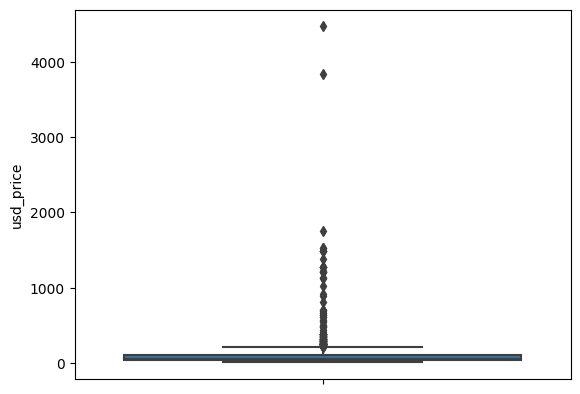

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Hong Kong'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] > 1000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
111398,2017-12-31,unknown,NaN,NaN,0,2.0,1,0,Hong Kong,22.30562,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1277.70000
158695,2017-03-23,within a day,0.5,1.00,0,128.0,1,1,Hong Kong,22.30486,...,999,8.3,8.0,9.0,9.0,9.0,9.0,9.0,1,1487.75388
92343,2014-12-03,within a few hours,0.8,0.00,0,2.0,1,1,Hong Kong,22.39783,...,1125,8.0,10.0,7.0,10.0,10.0,8.0,7.0,0,1277.70000
148094,2016-05-05,unknown,NaN,NaN,0,5.0,1,1,Hong Kong,22.29551,...,1125,6.0,10.0,2.0,10.0,10.0,10.0,6.0,0,1277.57223
129685,2017-03-23,within a day,0.5,1.00,0,128.0,1,1,Hong Kong,22.31842,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1487.75388
18282,2019-05-21,unknown,NaN,NaN,0,1.0,1,0,Hong Kong,22.29767,...,1125,9.3,10.0,8.0,10.0,9.0,10.0,9.0,1,1375.82736
152492,2019-05-28,unknown,NaN,NaN,0,1.0,1,0,Hong Kong,22.31630,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1526.97927
18190,2018-05-13,unknown,NaN,NaN,0,1.0,1,1,Hong Kong,22.32998,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1213.81500
207228,2018-05-16,unknown,NaN,1.00,0,13.0,1,1,Hong Kong,22.30403,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1022.03223
148095,2017-04-25,unknown,NaN,NaN,0,6.0,1,1,Hong Kong,22.29762,...,1125,9.3,10.0,9.0,10.0,10.0,10.0,10.0,1,1124.24823


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Hong Kong')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
179118,2014-09-14,unknown,NaN,NaN,0,3.0,1,1,Bangkok,13.74099,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28.388000
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,180,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.000000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.000000
118289,2019-11-25,a few days or more,0.2,1.0,0,9.0,1,1,Sydney,-33.90051,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,36.004100
53401,2018-12-14,unknown,NaN,NaN,0,6.0,1,1,Cape Town,-33.90905,...,1125,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,58.430070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164519,2018-06-14,unknown,NaN,NaN,0,4.0,1,0,Cape Town,-33.90863,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.897850
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.828000
248673,2017-12-29,within an hour,1.0,1.0,1,2.0,1,1,Mexico City,19.35042,...,10,9.6,10.0,10.0,10.0,10.0,10.0,10.0,1,32.045000
70903,2015-03-13,within a few hours,1.0,1.0,0,6.0,1,1,Cape Town,-33.92292,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.629565


# Preprocessing

---



In [ ]:
# Splitting the data into training and test sets to estimate generalization error

from sklearn.model_selection import train_test_split

X = listings_sample.drop("usd_price", axis=1)
y = listings_sample["usd_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((61062, 25), (15266, 25), (61062,), (15266,))

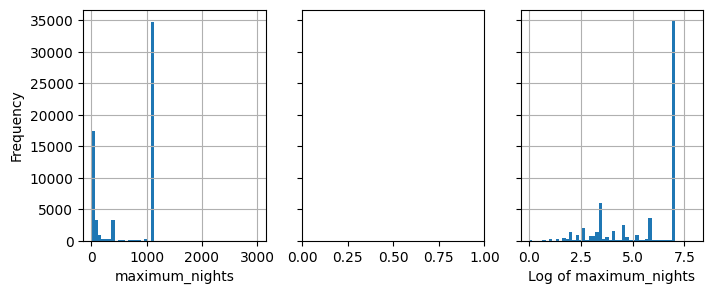

In [ ]:
###### something to think about: #######
# X_train_copy_num = X_train[['host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'minimum_nights',
#              'maximum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].copy()

# fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

# X_train_copy_num["maximum_nights"].hist(ax=axs[0], bins=50)
# #X_train_copy_num_std_scaled_df["population"].hist(ax=axs[1], bins=50)
# X_train_copy_num["maximum_nights"].apply(np.log).hist(ax=axs[2], bins=50)
# axs[0].set_xlabel("maximum_nights")
# axs[0].set_ylabel("Frequency")
# #axs[1].set_xlabel("Scaled population")
# axs[2].set_xlabel("Log of maximum_nights");

In [ ]:
# Building preprocessing pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn import set_config
set_config(display='diagram')

cat_attribs = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'city', 'room_type', 'instant_bookable'] # not sure if host_since (maybe split by months) is included here

num_attribs = ['host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'minimum_nights',
               'maximum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'] # excluding latitude and longitude

# missing_attribs = ['host_total_listings_count', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
#                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

num_pipeline = make_pipeline(IterativeImputer(random_state = 42), StandardScaler())

# Dropping amenities for now

preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first"), cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'),
                                 ['host_is_superhost', 'host_has_profile_pic',
                                  'host_identity_verified', 'city', 'room_type',
                                  'instant_bookable']),
                                ('num',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer(random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['host_total_listings_count', 'accommodates',
                                  'bedrooms', 'review_scores_rating',
                                  'review_scores_accuracy', 'minimum_nights',
                                  'maximum_nights', 'review_scores_cleanliness',
                                  'review_scores_checkin',
                                  'review_scores_communication',
                                  'review_scores_location',
                                  'review_scores_value'])])

In [ ]:
# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = preprocess_pipeline.transform(X_test)
t_y = y_test

# check sizes
X_train.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((61062, 25), (61062, 28), (61062,), (15266, 28), (15266,))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Creating a HistGradientBoostingRegressor with specified hyperparameters
hgb_clf = HistGradientBoostingRegressor(max_leaf_nodes=24, max_iter=80, learning_rate=0.07133747470888435)  # λ

# Fitting the regressor model on the training data
hgb_clf.fit(tr_X, tr_y)

# Printing the R2 score to evaluate the performance of the gradient boosting model on the test data
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to R2 score of {hgb_clf.score(t_X, t_y):.4f}.')

Gradient boosting with 80 trees leads to R2 score of 0.4199.


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Creating a HistGradientBoostingRegressor with specified hyperparameters
hgb_clf = HistGradientBoostingRegressor(max_leaf_nodes=24, max_iter=80, learning_rate=0.1)  # λ

# Fitting the regressor model on the training data
hgb_clf.fit(tr_X, tr_y)

# Printing the R2 score to evaluate the performance of the gradient boosting model on the test data
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to R2 score of {hgb_clf.score(t_X, t_y):.4f}.')

Gradient boosting with 80 trees leads to R2 score of 0.4294.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_leaf_nodes': randint(10, 25),
              'max_iter': randint(50, 100),
              'learning_rate': loguniform(1e-2, 2e-1)}

# Create the HistGradientBoostingRegressor
hgb_clf = HistGradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(hgb_clf, param_distributions=param_grid,
                                 cv=5, n_iter=100, scoring='r2', random_state=42)

# Fit the model with the training data
rand_search.fit(tr_X, tr_y)

# Print the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = rand_search.best_estimator_
r2_score = best_model.score(t_X, t_y)
print(f'R2 score on the test set: {r2_score:.4f}')

Best Hyperparameters: {'learning_rate': 0.1903106115057642, 'max_iter': 71, 'max_leaf_nodes': 20}
R2 score on the test set: 0.4240


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import loguniform, randint
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error



# param_grid = {'max_leaf_nodes': randint(2, 16),
#               'max_iter': randint(2, 32),
#               'learning_rate': loguniform(1e-2, 1)}

# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# rand_search = RandomizedSearchCV(HistGradientBoostingRegressor(random_state=42),
#                                  param_grid, cv=5, n_iter=30, scoring=scorer,
#                                  random_state=42)

# rand_search.fit(tr_X, tr_y)
# rand_cv_res = pd.DataFrame(rand_search.cv_results_)
# rand_cv_res.sort_values(by="mean_test_score", ascending=True, inplace=True)
# rand_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

In [ ]:
from xgboost import XGBRegressor
# We'll need to use a portion of the training data as 'validation' data to determine how many trees to grow
tr_X_tr, tr_X_v, tr_y_tr, tr_y_v = train_test_split(tr_X, tr_y, test_size = .2, random_state=0)

bst = XGBRegressor(n_estimators=80,
                    max_leaves=24,
                    learning_rate=0.07133747470888435,
                    eval_metric='rmse',
                    num_parallel_tree = 2,
                    colsample_bytree=0.6,
                    subsample=0.6,
                    early_stopping_rounds=10)
bst.fit(tr_X_tr, tr_y_tr, eval_set=[(tr_X_v, tr_y_v)], verbose=False)

print(f'Root Mean Squared Error of XGBoost is {bst.score(t_X, t_y):.4f}.')

Root Mean Squared Error of XGBoost is 0.0758.
